# Himawari image for 2025-02-3T07:51:04Z

In [1]:
from importlib import reload

import numpy as np
from numpy import ma
import xarray

from copy import deepcopy

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

from remote_sensing.download import podaac
from remote_sensing.healpix import rs_healpix
from remote_sensing.healpix import plotting as hp_plotting
from remote_sensing.healpix import utils as hp_utils

# Download the past day of files in the region

## Grab em

In [2]:
data_files, _ = podaac.grab_file_list('H09-AHI-L3C-ACSPO-v2.90', dt_past=dict(days=1),
                                             bbox='127,18,134,23')
data_files[0:2]

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/H09-AHI-L3C-ACSPO-v2.90/20250203050000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/H09-AHI-L3C-ACSPO-v2.90/20250203040000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc']

## Download em

In [3]:
reload(podaac)
local_files = podaac.download_files(data_files, verbose=False)

Using default download directory: /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC
Downloaded 1 files, failed on 0 files, skipped 20 existing files.


# Generate RS_Healpix objects

In [4]:
reload(rs_healpix)
rs_hpxs = []
for data_file in local_files[0:8]:
    # Load
    #ds = xarray.open_dataset(data_file)
    # Cut
    #sst = ds.sea_surface_temperature.sel(lat=slice(23,18), 
    #             lon=slice(127., 134.)).isel(time=0)
    # Objectify
    rs_hpx = rs_healpix.RS_Healpix.from_dataarray_file(
        data_file, 'sea_surface_temperature',
        lat_slice=slice(23,18),  lon_slice=slice(127., 134.), time_isel=0)
    # 
    print(f"Generatde RS_Healpix from {data_file}")
    # Add
    rs_hpxs.append(rs_hpx)

Generatde RS_Healpix from /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90/20250203050000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Generatde RS_Healpix from /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90/20250203040000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Generatde RS_Healpix from /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90/20250203030000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Generatde RS_Healpix from /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90/20250203020000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Generatde RS_Healpix from /home/xavier/Projects/Oceanography/data/Remote_Sensing/PODAAC/H09-AHI-L3C-ACSPO-v2.90/20250203010000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Generatde RS_Healpix from /home/xavier/Projects/Oc

In [16]:
rs_hpxs[0]

<RS_Healpix: nside=2048, npix=50331648
 file=20250203040000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc, var="sea_surface_temperature">

# Add em

In [5]:
r0 = rs_hpxs[0]
r1 = rs_hpxs[1]

In [6]:
type(r0.hp)

numpy.ma.MaskedArray

## Plot me

In [30]:
def plot_one(rs_hpx, ax=None, show=True):
    reload(hp_plotting)
    ax = hp_plotting.plot_rs_hp(rs_hpx, figsize=(5,3),
                              projection='platecarree', ssize=4.,
                               cb_tsize=11., cb_lbl='T (deg K)', cb_lsize=11.,
                               ax=ax)
    # Zoom in
    ax.set_xlim(127.,134.)
    ax.set_ylim(18.,23.)
    if show:
        plt.show()

In [39]:
#mn = flexible_average_masked_arrays([r0.hp, r1.hp])
mn = flexible_average_masked_arrays([item.hp for item in rs_hpxs])
np.sum(mn.mask), np.sum(r0.hp.mask), np.sum(r1.hp.mask)

(np.int64(50316749), np.int64(50327106), np.int64(50326963))

In [40]:
rs = deepcopy(r1)
rs.hp = mn.copy()

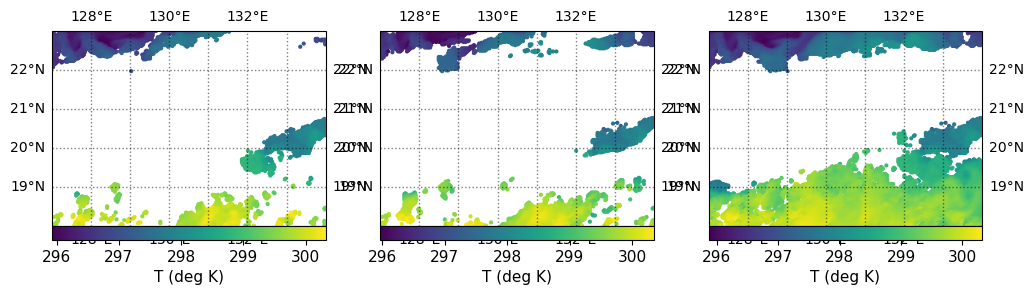

In [41]:
tformP = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 5))
# Create each subplot with its own projection
ax1 = fig.add_subplot(131, projection=tformP)
ax2 = fig.add_subplot(132, projection=tformP)
ax3 = fig.add_subplot(133, projection=tformP)

plot_one(r0, ax=ax1, show=False)
plot_one(r1, ax=ax2, show=False)
plot_one(rs, ax=ax3, show=False)
plt.show()

<Figure size 640x480 with 0 Axes>

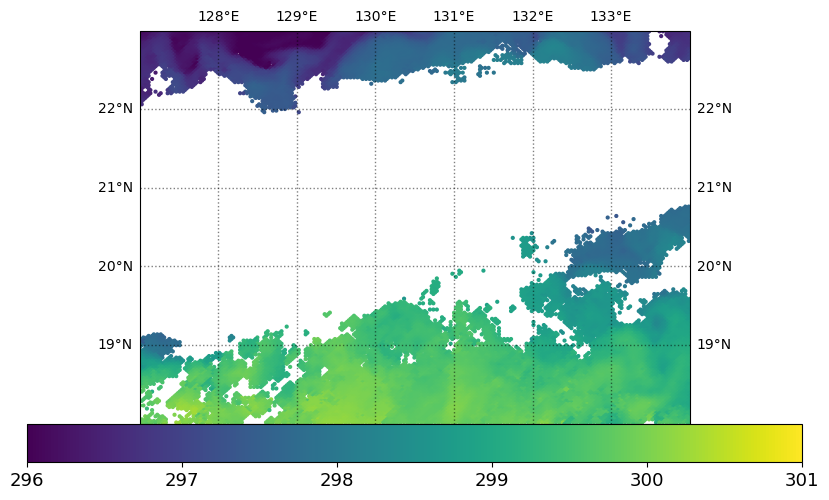

In [43]:
reload(hp_plotting)
plt.clf()
ax = hp_plotting.plot_rs_hp(rs, figsize=(10,6), vmin=296., vmax=301,
                          projection='platecarree', ssize=4.)
# Zoom in
ax.set_xlim(127.,134.)
ax.set_ylim(18.,23.)
plt.show()

----

In [90]:
r0

<RS_Healpix: nside=2048, npix=50331648
 file=20250203040000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc, var="sea_surface_temperature">

In [91]:
r1

<RS_Healpix: nside=2048, npix=50331648
 file=20250203030000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc, var="sea_surface_temperature">

In [34]:
import numpy as np
import numpy.ma as ma

def flexible_average_masked_arrays(arrs):
    """
    Average two masked arrays, using values that exist in either array.
    If a value exists in only one array, use that value instead of masking it.
    
    Parameters:
    -----------
    arr1, arr2 : numpy.ma.MaskedArray
        Input masked arrays to average
        
    Returns:
    --------
    numpy.ma.MaskedArray
        Averaged array, preserving values that exist in at least one input
    """
    # Count valid (non-masked) values at each position
    #valid_count = (1-arr1.mask.astype(int)) + (1-arr2.mask.astype(int)) 
    valid_count = np.zeros(arrs[0].size)
    summed = valid_count.copy()
    for arr in arrs:
        valid_count += (1-arr.mask.astype(int))
        # Sum the arrays, treating masked values as 0
        summed += arr.filled(0)
    
    # Sum the arrays, treating masked values as 0
    #summed = arr1.filled(0) + arr2.filled(0)
    
    # Create mask for positions where both values are masked/NaN
    final_mask = valid_count == 0
    
    # Divide by count of valid values (1 or 2) to get average
    # Note: divide by 1 where only one value exists
    result = ma.array(summed / np.maximum(valid_count, 1), mask=final_mask)
    
    return result

# Example:
# arr1 = ma.array([1, 2, np.nan, 4], mask=[False, False, False, True])
# arr2 = ma.array([2, np.nan, 6, 8], mask=[False, False, False, False])
# result = flexible_average_masked_arrays(arr1, arr2)
# This will give you values even where only one array has data

In [87]:
valid_count = (1-r0.hp.mask.astype(int)) + (1-r1.hp.mask.astype(int)) 
r0.hp.size - np.sum(valid_count > 0)

np.int64(50291540)

In [89]:
np.all(r0.hp.mask == r1.hp.mask)

np.True_

----

In [95]:
ds = xarray.open_dataset(local_files[0])
ds.sea_surface_temperature.data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [ ]:
reload(hp_utils)
items = hp_utils.evals_to_healpix(ds.sea_surface_temperature)